# Rate vs Cross section

In general we can write the relation between Rate, $\frac{dR}{d\Omega}$, and the Cross Section, $\frac{d\sigma}{d\Omega}$: 

$$
\frac{dR}{d\Omega} = \epsilon_{spettrometer} N_c \Phi \frac{d\sigma}{d\Omega}
$$
 
where $N_c$ is the number of scattering center and $\Phi$ is the flux of the particles. 

## Calculus of the number of scattering center
We can think that at first approximation, $N_c$ is the number of electrons in the illuminated region of the target, and so it follow the following equation:
$$
N_c = \rho \frac{N_aZ}{\text{MM}}V
$$
where: 
- $\rho$ is the density of the scattering target
- $N_a$ is the Avogadro number
- $Z$ is the atomic number of the scattering target
- $\text{MM}$ is the molar mass of the scattering target
- $V$ is the volume

In [33]:
import numpy as np

# Calculus of the solid angle
r_gate = 1.27  #cm
d_gate_source = 16 #cm
alpha = np.arctan(r_gate / d_gate_source)
Omega = 2 * np.pi * (1 - np.cos(alpha)) #sr

r_sorg_targ = 5 #cm
R = r_sorg_targ * np.tan(alpha)

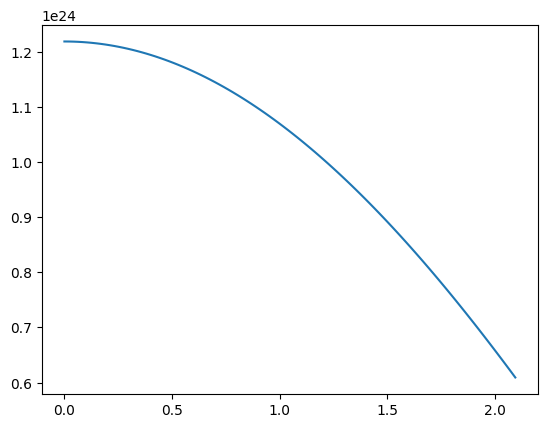

In [34]:
def A(theta, R):
    return np.pi * R ** 2 * np.cos(theta/2) 
    # QUESTO PRODOTTO NON HA SENSO, MA NON CAPISCO PERCHè FUNZIONA

def V(theta, R, width):
    return A(theta, R) * width

def N_c(theta, R, width):
    #For a Cu target
    rho = 8.96 #g/cm^3
    N_a = 6.022e23 #mol^-1
    Z = 29 #number of electrons
    MM = 63.546 #g/mol

    #Calculus of the number of atoms in the target
    N_c = rho * (N_a * Z / MM) * V(theta, R, width)
    return N_c

import matplotlib.pyplot as plt

thetas = np.linspace(0, (2/3) * np.pi, 100)
plt.plot(thetas, N_c(thetas, R, 1), label='N_c(theta)')
plt.show()

## Calculus of the flux
We can think at the flux as the number of particle that pass through the detector surface per seconds, so we can write: 


$$
\Phi = \frac{S(t)\text{BR}}{A_{gate}}\frac{\Delta\Omega}{4\pi}\epsilon_{gate}(511)
$$

where: 
- $S(t)$ is the activity of the source in Bq
- $\text{BR}$ is the branching ratio of the 511 keV photon
- $A_{gate}$ is the detector surface 
- $\frac{\Delta\Omega}{4\pi}$ is the solid angle
- $\epsilon_{gate}(511)$ is the efficiency of the gate detector for the 511 keV photon

In [35]:
def flux():
    S = 175000 #Bq
    BR = 0.903 * 2

    epsilon_gate = 0.17

    r_gate = 1.27  #cm
    A_gate = np.pi * r_gate ** 2 #cm^2

    # Calculus of the flux
    flux = (S * BR/A_gate) * (Omega / (4 * np.pi)) * epsilon_gate #cm^-2 s^-1
    return flux

print(flux())

16.62296997338231


## Calculus of the cross section
The cross section has to be the Klein-Nshina formula: 

$$
\frac{d\sigma}{d\Omega} = \frac{r_e^2}{2}\bigg(\frac{\omega'}{\omega}\bigg)^2\bigg[\frac{\omega'}{\omega} + \frac{\omega}{\omega'} - \sin^2(\theta)\bigg]
$$


## Calculus of Rate vs Cross Section
We can resume all the upper calculus to find the constant between the Rate and the Cross section: 

<function matplotlib.pyplot.show(close=None, block=None)>

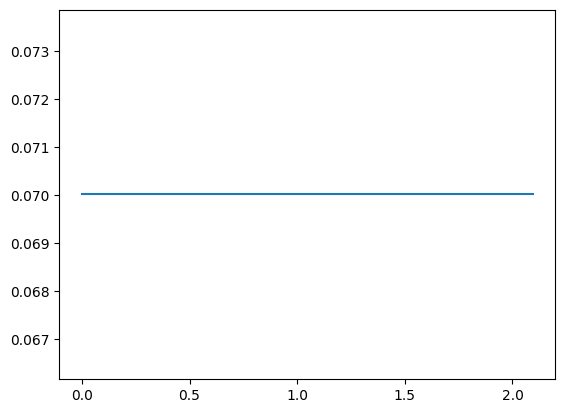

In [36]:
def epsilon_spettrometer(theta): # formula non è corretta
    A = 0.42719
    B = 0.58613
    C = 1.69372
    D = 0.07002

    E  = 511 / (2 - np.cos(theta))

    return A * pow(E, -B) * np.exp(-C * E) + D


plt.plot(thetas, epsilon_spettrometer(thetas))
plt.show

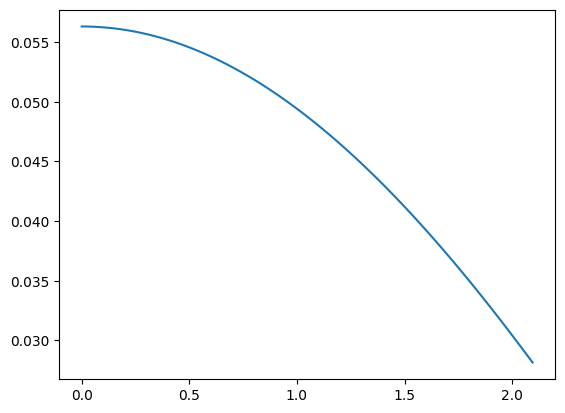

In [37]:
r_e = 2.81794e-13 #cm

def const (theta, R):
    return (r_e ** 2 / 2) * N_c(theta, R, 1) * flux() * epsilon_spettrometer(theta)

plt.plot(thetas, const(thetas, R))
plt.show()